In [4]:
import pddlgym
import gym
import imageio
from pddlgym_planners.ff import FF  # FastForward
from pddlgym_planners.fd import FD  # FastDownward
import os
import matplotlib.pyplot as plt

In [5]:
for env in gym.envs.registry.keys():
    if 'Snake' in env:
        print(env)

PDDLEnvSnake-v0
PDDLEnvSnakeTest-v0


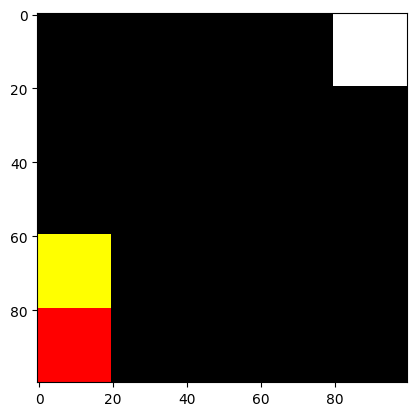

In [7]:
env_name = 'PDDLEnvSnake-v0'

env = pddlgym.make(env_name)
env.fix_problem_index(1)
obs, debug_info = env.reset()

plt.imshow(env.render())

In [9]:
env.problems

Equivalent CLI command for FF planner on snake problem 1

```
/Users/vla/umd/CMSC722_ai_planning/CMSC722_project/pddlgym_planners/pddlgym_planners/FF-v2.3/ff -o /Users/vla/umd/CMSC722_ai_planning/CMSC722_project/pddlgym/pddlgym/pddl/snake.pddl -f /Users/vla/umd/CMSC722_ai_planning/CMSC722_project/pddlgym/pddlgym/pddl/snake/p01.pddl

``

In [6]:
for env_name in ['PDDLEnvSnake-v0', 'PDDLEnvSnakeTest-v0']:

    # for planner_name, planner in zip(['FF', 'FD'], [FF, FD]):
    for planner_name, planner in zip(['FD'], [FD]):


        exp_dir = f'./{env_name}/{planner_name}'
        os.makedirs(exp_dir, exist_ok=True)

        env = pddlgym.make(env_name)
        obs, debug_info = env.reset()

        # render env and save initial state as image
        img = env.render()
        imageio.imsave(os.path.join(exp_dir, "snake_p01_step_00.png"), img)


        # Planning with PDDL planner
        planner = planner()
        state, _ = env.reset()
        plan = planner(env.domain, state)
        # print("Plan:", ff_planner(env.domain, state))

        state_index = 1
        for action in plan:
            print(action)
            print("Obs:", obs)
            print("Act:", action)
            obs, reward, done, truncated, debug_info = env.step(action)

            img = env.render()
            imageio.imsave(os.path.join(exp_dir, f"snake_p01_step_{state_index:02d}.png"), img)
            state_index += 1


        print("Final obs, reward, done:", obs, reward, done)

        len(plan)

        print("Statistics:", planner.get_statistics())

Instantiating FD with --alias seq-opt-lmcut 


PlanningFailure: Plan not found with FD! Error: INFO     planner time limit: None
INFO     planner memory limit: None

INFO     Running translator.
INFO     translator stdin: None
INFO     translator time limit: None
INFO     translator memory limit: None
INFO     translator command line string: /Users/vla/.local/share/mamba/envs/CMSC722/bin/python3 -m translate /var/folders/9s/yxmqx5dj6rb86f2zsgmn5z2m0000gn/T/tmpw70uafes /var/folders/9s/yxmqx5dj6rb86f2zsgmn5z2m0000gn/T/tmpr02ra73o --sas-file /var/folders/9s/yxmqx5dj6rb86f2zsgmn5z2m0000gn/T/tmpbqqo0_2w
Parsing...

Found the following duplicate objects: dummypoint
translate exit code: 31

Driver aborting after translate
INFO     Planner time: 0.03s

In [5]:
len(plan)

29

In [6]:
!magick -delay 30 {exp_dir}/*snake* {exp_dir}/animation.gif